In [1]:
import pickle
import os
import pandas as pd

file_path = "Myntra dataset.xlsx"
pickle_file = "saved_data.pkl"

# Try loading from Pickle, else load from Excel
if os.path.exists(pickle_file):
    with open(pickle_file, "rb") as f:
        data = pickle.load(f)
    df_customers, df_products, df_orders = data["df_customers"], data["df_products"], data["df_orders"]
    print("Data loaded from Pickle.")
else:
    df_customers = pd.read_excel(file_path, sheet_name="dim_customers")
    df_products = pd.read_excel(file_path, sheet_name="dim_products")
    df_orders = pd.read_excel(file_path, sheet_name="fact_orders")

    # Save to Pickle for future use
    with open(pickle_file, "wb") as f:
        pickle.dump({"df_customers": df_customers, "df_products": df_products, "df_orders": df_orders}, f)
    print("Data loaded from Excel and saved for next time.")


Data loaded from Pickle.


# 🛍️ **Myntra's Data Analysis **

In [3]:
from IPython.display import display, Markdown

markdown_text = """
### 📊 Unveiling Insights from Sales & Customer Behavior  
In this analysis, we explore:  
🔹 **Which brands and categories drive the highest revenue?**  
🔹 **How do discounts impact sales and customer behavior?**  
🔹 **What are the trends in Average Order Value (AOV) across different demographics?**  
🔹 **How do purchasing patterns vary between weekdays and weekends?**  
🔹 **Which customer segments contribute the most to revenue?**  
___  
**By leveraging data-driven insights, we can optimize sales strategies, enhance customer engagement, and drive growth.**  
Time to turn data into decisions—let’s explore the insights! 
"""

display(Markdown(markdown_text))



### 📊 Unveiling Insights from Sales & Customer Behavior  
In this analysis, we explore:  
🔹 **Which brands and categories drive the highest revenue?**  
🔹 **How do discounts impact sales and customer behavior?**  
🔹 **What are the trends in Average Order Value (AOV) across different demographics?**  
🔹 **How do purchasing patterns vary between weekdays and weekends?**  
🔹 **Which customer segments contribute the most to revenue?**  
___  
**By leveraging data-driven insights, we can optimize sales strategies, enhance customer engagement, and drive growth.**  
Time to turn data into decisions—let’s explore the insights! 


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
products = pd.read_excel("Myntra dataset.xlsx", sheet_name = "dim_products")
products

,Product ID,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,P0001,Women,Topwear,T-Shirts,Roadster,40,Black,4
1,P0002,Women,Topwear,T-Shirts,Roadster,40,Blue,5
2,P0003,Women,Topwear,T-Shirts,Roadster,42,White,3
3,P0004,Women,Topwear,T-Shirts,Roadster,44,Green,2
4,P0005,Women,Topwear,T-Shirts,Puma,38,Olive,5
...,...,...,...,...,...,...,...,...
3066,P3067,Kids,Footwear,Sandals,Campus,9-12M,Olive,5
3067,P3068,Kids,Footwear,Sandals,Campus,9-12M,Teal,3
3068,P3069,Kids,Footwear,Sandals,Campus,3-6M,Sea Green,5
3069,P3070,Kids,Footwear,Sandals,Campus,3-6M,Turquoise Blue,5


In [4]:
customers = pd.read_excel("Myntra dataset.xlsx", sheet_name = "dim_customers")
customers

,Customer ID,Customer Age,City,State
0,C001,30,Mumbai,Maharashtra
1,C002,35,Mumbai,Maharashtra
2,C003,36,Mumbai,Maharashtra
3,C004,40,Pune,Maharashtra
4,C005,25,Pune,Maharashtra
...,...,...,...,...
95,C096,36,Jodhpur,Rajasthan
96,C097,37,Jodhpur,Rajasthan
97,C098,38,Udaipur,Rajasthan
98,C099,39,Udaipur,Rajasthan


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer ID   100 non-null    object
 1   Customer Age  100 non-null    int64 
 2   City          100 non-null    object
 3   State         100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


In [6]:
orders = pd.read_excel("Myntra dataset.xlsx", sheet_name = "fact_orders")
orders

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%
0,OD0001,C001,P0001,2021-05-20,349,0.30
1,OD0002,C002,P0001,2021-01-19,350,0.30
2,OD0003,C003,P0001,2021-10-28,351,0.30
3,OD0004,C004,P0001,2021-05-20,352,0.25
4,OD0005,C005,P0001,2022-11-08,353,0.25
...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50
3496,OD3497,C082,P3071,2022-07-08,707,0.50
3497,OD3498,C083,P3071,2021-02-06,1819,0.50
3498,OD3499,C084,P3071,2021-07-18,856,0.50


In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product ID    3071 non-null   object
 1   Category      3071 non-null   object
 2   Sub-category  3071 non-null   object
 3   Product Name  3071 non-null   object
 4   Brand Name    3071 non-null   object
 5   Size          3071 non-null   object
 6   Color         3071 non-null   object
 7   Ratings       3071 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 192.1+ KB


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer ID   100 non-null    object
 1   Customer Age  100 non-null    int64 
 2   City          100 non-null    object
 3   State         100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        3500 non-null   object        
 1   Customer ID     3500 non-null   object        
 2   Product ID      3500 non-null   object        
 3   Date            3500 non-null   datetime64[ns]
 4   Original Price  3500 non-null   int64         
 5   Discount%       3500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 164.2+ KB


In [10]:
orders.describe()

,Date,Original Price,Discount%
count,3500,3500.000000,3500.000000
mean,2022-02-15 04:32:46.628571392,843.840000,0.355146
min,2021-01-01 00:00:00,123.000000,0.100000
25%,2021-07-23 00:00:00,456.000000,0.300000
50%,2022-02-19 00:00:00,634.000000,0.350000
75%,2022-09-06 00:00:00,1119.000000,0.420000
max,2023-03-31 00:00:00,22365.000000,0.550000
std,NaN,689.706016,0.100804


In [11]:
#Check for duplicates
products.duplicated().sum()
customers.duplicated().sum()
orders.duplicated().sum()

np.int64(0)

In [12]:
products.duplicated().sum()

np.int64(0)

In [13]:
products.drop_duplicates()

,Product ID,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,P0001,Women,Topwear,T-Shirts,Roadster,40,Black,4
1,P0002,Women,Topwear,T-Shirts,Roadster,40,Blue,5
2,P0003,Women,Topwear,T-Shirts,Roadster,42,White,3
3,P0004,Women,Topwear,T-Shirts,Roadster,44,Green,2
4,P0005,Women,Topwear,T-Shirts,Puma,38,Olive,5
...,...,...,...,...,...,...,...,...
3066,P3067,Kids,Footwear,Sandals,Campus,9-12M,Olive,5
3067,P3068,Kids,Footwear,Sandals,Campus,9-12M,Teal,3
3068,P3069,Kids,Footwear,Sandals,Campus,3-6M,Sea Green,5
3069,P3070,Kids,Footwear,Sandals,Campus,3-6M,Turquoise Blue,5


In [14]:
# Converted order date to datetime
orders["Date"] = pd.to_datetime(orders["Date"])

In [15]:
# Calculated Total Price after Discount
orders["Total Price"] = orders["Original Price"] - (orders["Original Price"] * orders["Discount%"])

In [16]:
# Extract Month and Year for Aggregation
orders["Month-Year"] = orders["Date"].dt.strftime("%Y-%m")
#orders["Order Value"] = orders["Total Price"]
# Using 'Total Price' instead of 'Order Value' to avoid redundancy, 
# since Total Price already represents the final transaction amount after discounts.

In [17]:
gb = orders.groupby("Month-Year").agg({"Total Price": "sum"}).rename(columns={"Total Price": "Total Revenue"})

In [18]:
df = pd.merge(left = orders, right= products, on = "Product ID", how = "inner" )
df

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Total Price,Month-Year,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,OD0001,C001,P0001,2021-05-20,349,0.30,244.30,2021-05,Women,Topwear,T-Shirts,Roadster,40,Black,4
1,OD0002,C002,P0001,2021-01-19,350,0.30,245.00,2021-01,Women,Topwear,T-Shirts,Roadster,40,Black,4
2,OD0003,C003,P0001,2021-10-28,351,0.30,245.70,2021-10,Women,Topwear,T-Shirts,Roadster,40,Black,4
3,OD0004,C004,P0001,2021-05-20,352,0.25,264.00,2021-05,Women,Topwear,T-Shirts,Roadster,40,Black,4
4,OD0005,C005,P0001,2022-11-08,353,0.25,264.75,2022-11,Women,Topwear,T-Shirts,Roadster,40,Black,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50,342.50,2023-01,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3496,OD3497,C082,P3071,2022-07-08,707,0.50,353.50,2022-07,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3497,OD3498,C083,P3071,2021-02-06,1819,0.50,909.50,2021-02,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3498,OD3499,C084,P3071,2021-07-18,856,0.50,428.00,2021-07,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4


In [23]:
# Define Myntra Color Palette (Gradient Shades of Pink and Orange)
myntra_palette = sns.color_palette(["#ff3f6c", "#ff7996", "#ffb3c1", "#ff6200", "#ff914d", "#ffb27d", "#ffcc00", "#ff914d", "#ff7b00", "#ff6200"])

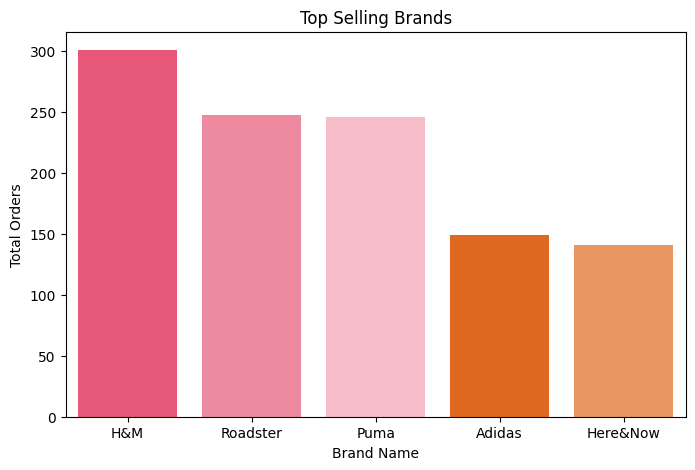

In [24]:
# Define Top Selling Brands
top_brands = df["Brand Name"].value_counts().head(5)
# Top Selling Brands
plt.figure(figsize=(8,5))
sns.barplot(x=top_brands.index, y=top_brands.values, hue=top_brands.index, palette=myntra_palette[:len(top_brands)], legend=False)
plt.title("Top Selling Brands")
plt.ylabel("Total Orders")
plt.show()



In [75]:
from IPython.display import display, Markdown

display(Markdown(
    "### Power Players: Invest in Proven Performers  \n"
    "**Insight:**  \n"
    "Puma, H&M, Roadster, Adidas, and Here&Now generate the most revenue.  \n\n"
    "**Recommendation:**  \n"
    "Strengthen partnerships, prioritize ad spend, and expand exclusive collections."
))


### Power Players: Invest in Proven Performers  
**Insight:**  
Puma, H&M, Roadster, Adidas, and Here&Now generate the most revenue.  

**Recommendation:**  
Strengthen partnerships, prioritize ad spend, and expand exclusive collections.

In [25]:
# Merge orders with customers to include City
df = pd.merge(df, customers[["Customer ID", "City"]], on="Customer ID", how="left")
df

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Total Price,Month-Year,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings,City
0,OD0001,C001,P0001,2021-05-20,349,0.30,244.30,2021-05,Women,Topwear,T-Shirts,Roadster,40,Black,4,Mumbai
1,OD0002,C002,P0001,2021-01-19,350,0.30,245.00,2021-01,Women,Topwear,T-Shirts,Roadster,40,Black,4,Mumbai
2,OD0003,C003,P0001,2021-10-28,351,0.30,245.70,2021-10,Women,Topwear,T-Shirts,Roadster,40,Black,4,Mumbai
3,OD0004,C004,P0001,2021-05-20,352,0.25,264.00,2021-05,Women,Topwear,T-Shirts,Roadster,40,Black,4,Pune
4,OD0005,C005,P0001,2022-11-08,353,0.25,264.75,2022-11,Women,Topwear,T-Shirts,Roadster,40,Black,4,Pune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50,342.50,2023-01,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4,Amritsar
3496,OD3497,C082,P3071,2022-07-08,707,0.50,353.50,2022-07,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4,Amritsar
3497,OD3498,C083,P3071,2021-02-06,1819,0.50,909.50,2021-02,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4,Patiala
3498,OD3499,C084,P3071,2021-07-18,856,0.50,428.00,2021-07,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4,Patiala


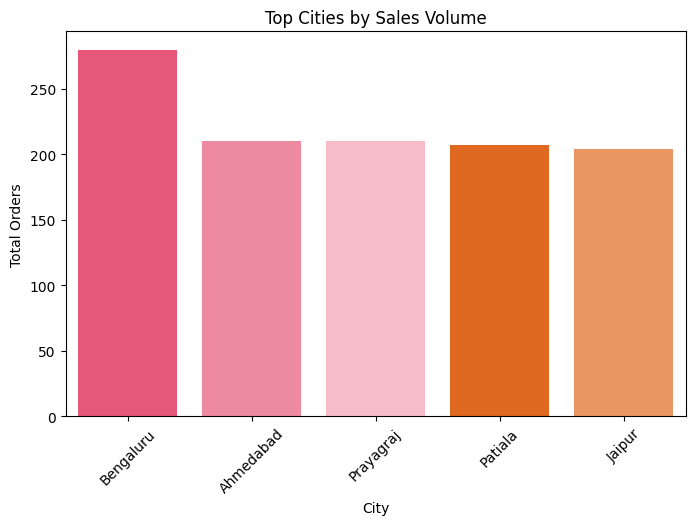

In [26]:
# Sales Performance by City
if "City" in df.columns:
    top_cities = df["City"].value_counts().head(5)
    plt.figure(figsize=(8,5))
    sns.barplot(x=top_cities.index, y=top_cities.values, hue=top_cities.index, palette=myntra_palette[:len(top_cities)], legend=False)
    plt.title("Top Cities by Sales Volume")
    plt.ylabel("Total Orders")
    plt.xlabel("City")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("City column not found in dataset. Ensure that the 'customers' table was merged if city data is required.") 

In [65]:
display(Markdown(
    "### Location-Based Strategy for Higher Sales  \n"
    "**Insight:**  \n"
    "Bengaluru, Ahmedabad, Vadodara, Prayagraj, and Patiala **lead in revenue generation**.  \n\n"
    "**Recommendation:**  \n"
    "Optimize regional campaigns & logistics for higher efficiency."
))


### Location-Based Strategy for Higher Sales  
**Insight:**  
Bengaluru, Ahmedabad, Vadodara, Prayagraj, and Patiala **lead in revenue generation**.  

**Recommendation:**  
Optimize regional campaigns & logistics for higher efficiency.

In [27]:
# Categorizing customers into age groups using "Customer Age"
bins = [18, 25, 35, 45, 55, 65, 100]  
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]  
customers["Age Group"] = pd.cut(customers["Customer Age"], bins=bins, labels=labels, right=False)

In [28]:
# Merge Customer Age Group with Orders
orders_age = orders.merge(customers[["Customer ID", "Age Group"]], on="Customer ID", how="left")


In [29]:
# Calculate Average Order Value (AOV) per Customer Age Group
aov_age = orders_age.groupby("Age Group", observed=False)["Total Price"].mean().sort_index()

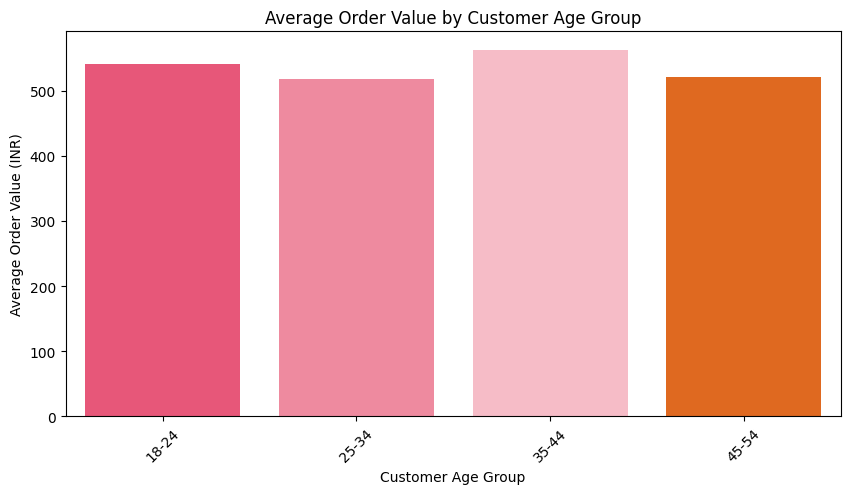

In [31]:
#Average Order Value by Customer Age Group
plt.figure(figsize=(10,5))
sns.barplot(x=aov_age.index.astype(str), y=aov_age.values, hue=aov_age.index.astype(str), palette=myntra_palette[:len(aov_age)], legend=False)
plt.title("Average Order Value by Customer Age Group")
plt.xlabel("Customer Age Group")
plt.ylabel("Average Order Value (INR)")
plt.xticks(rotation=45)
plt.show()

In [66]:
from IPython.display import display, Markdown
display(Markdown(
    "### High Spending Potential in the 35-44 Age Group  \n"
    "**Insight:**  \n"
    "Customers in the **35-44 age group** have the highest **Average Order Value (AOV)**, indicating a willingness to spend more per transaction.  \n\n"
    "**Recommendation:**  \n"
    "Introduce premium product lines, exclusive bundles, and personalized recommendations to maximize revenue from this high-value segment."
))


### High Spending Potential in the 35-44 Age Group  
**Insight:**  
Customers in the **35-44 age group** have the highest **Average Order Value (AOV)**, indicating a willingness to spend more per transaction.  

**Recommendation:**  
Introduce premium product lines, exclusive bundles, and personalized recommendations to maximize revenue from this high-value segment.

In [32]:
# Binning Discount Brackets for better trend analysis
bins = [0, 10, 20, 30, 40, 50, 60, 100]  
labels = ["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60%+"]

orders["Discount Bracket"] = pd.cut(orders["Discount%"] * 100, bins=bins, labels=labels, right=False)
orders["Discount%"] = orders["Discount%"].astype(float)
orders["Discount%"] = pd.to_numeric(orders["Discount%"], errors="coerce")


In [33]:
# Aggregating revenue per Discount Bracket
discount_revenue = orders.groupby("Discount%")[["Total Price"]].sum().rename(columns={"Total Price": "Total Revenue"})

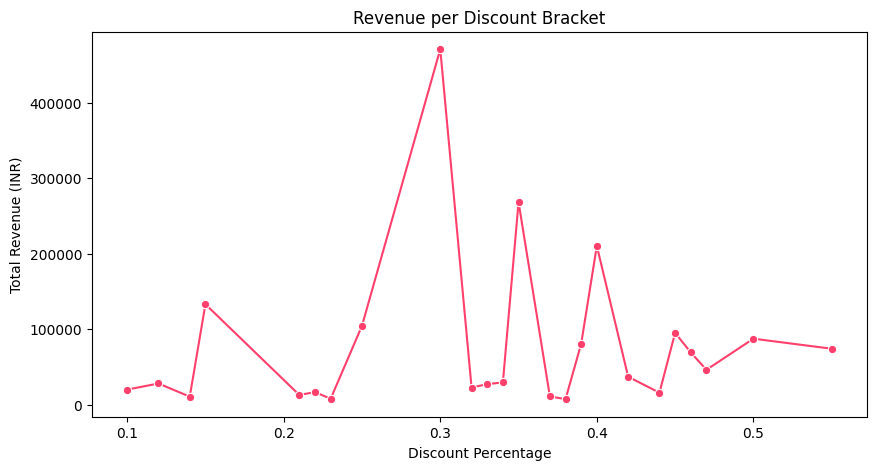

In [35]:
# Revenue per Discount Bracket
plt.figure(figsize=(10,5))
sns.lineplot(x=discount_revenue.index, y=discount_revenue["Total Revenue"], marker='o', color=myntra_palette[0])
plt.title("Revenue per Discount Bracket")
plt.xlabel("Discount Percentage")
plt.ylabel("Total Revenue (INR)")
plt.show()


In [67]:
display(Markdown(
    "### Optimal Discount Strategy  \n"
    "**Insight:**  \n"
    "The **30-40% discount range** yields the highest revenue (₹918,682.51). However, the **30% discount bracket sees a revenue spike** due to 43 high-value orders, suggesting a potential outlier or targeted pricing advantage.  \n\n"
    "**Recommendation:**  \n"
    "Analyze outliers further and refine discounting strategies to maximize profitability."
))


### 3️⃣ Optimal Discount Strategy  
**Insight:**  
The **30-40% discount range** yields the highest revenue (₹918,682.51). However, the **30% discount bracket sees a revenue spike** due to 43 high-value orders, suggesting a potential outlier or targeted pricing advantage.  

**Recommendation:**  
Analyze outliers further and refine discounting strategies to maximize profitability.

In [36]:
# Group by Category using the merged dataframe 'df'
aov_category = df.groupby("Category")["Total Price"].mean().sort_values(ascending=False)

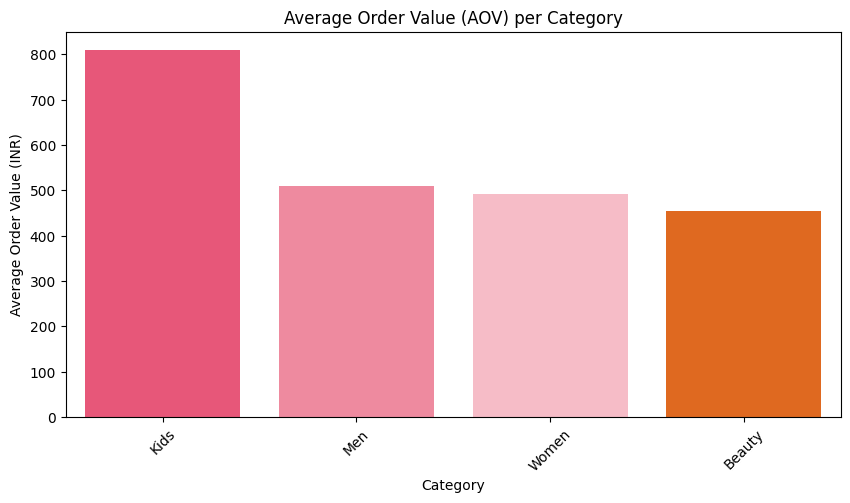

In [68]:
#AOV per Category
plt.figure(figsize=(10,5))
sns.barplot(x=aov_category.index, y=aov_category.values, palette=myntra_palette[:len(aov_category)], hue=aov_category.index, legend=False)
plt.title("Average Order Value (AOV) per Category")
plt.xlabel("Category")
plt.ylabel("Average Order Value (INR)")
plt.xticks(rotation=45)
plt.show()



In [69]:
display(Markdown(
    "### Kids' Category = High Spending Potential  \n"
    "**Insight:**  \n"
    "The **highest Average Order Value (AOV) is in the Kids’ category**.  \n\n"
    "**Recommendation:**  \n"
    "Expand premium product lines to capture higher-margin sales."
))


### Kids' Category = High Spending Potential  
**Insight:**  
The **highest Average Order Value (AOV) is in the Kids’ category**.  

**Recommendation:**  
Expand premium product lines to capture higher-margin sales.

In [38]:
# Calculated total sales per brand
brand_sales = df.groupby("Brand Name")["Total Price"].sum()

In [39]:
# Get top 5 brands based on total sales
top_5_brands = brand_sales.nlargest(5).index

In [40]:
# Filtered dataset to include only top 5 brands
df_top_brands = df[df["Brand Name"].isin(top_5_brands)]

In [41]:
# Group by Brand & Category, count orders, and sort by total sales
brand_category = (
    df_top_brands.groupby(["Brand Name", "Category"])
    .size()
    .unstack()
    .fillna(0)
    .loc[top_5_brands]  # Ensure brands are sorted by total sales
)

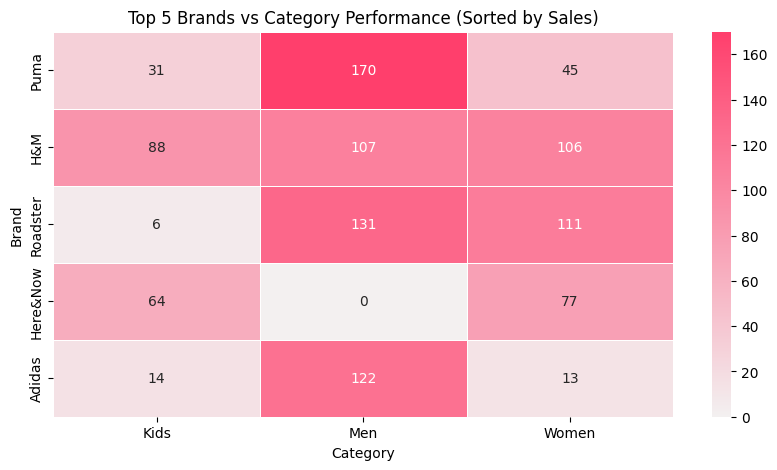

In [42]:
# Brand vs. Category Performance (Top 5 Brands)
plt.figure(figsize=(10, 5))
sns.heatmap(brand_category, cmap=sns.light_palette("#ff3f6c", as_cmap=True), annot=True, fmt='.0f', linewidths=0.5)
plt.title("Top 5 Brands vs Category Performance (Sorted by Sales)")
plt.xlabel("Category")
plt.ylabel("Brand")
plt.show()  


In [70]:
from IPython.display import display, Markdown
display(Markdown(
    "### 🔥 Top 5 Brands vs. Category Performance 🔥  \n"
    "**Insight:**  \n"
    "- **Puma** dominates the **Men's category** with the highest sales (170).  \n"
    "- **H&M** maintains a balanced presence across **all three categories**.  \n"
    "- **Roadster** and **Adidas** perform strongly in **Men’s** but underperform in **Kids & Women**.  \n"
    "- **Here&Now** has **zero sales** in **Men's category**, indicating a brand positioning gap.  \n\n"
    "**Recommendation:**  \n"
    "- Focus on **Men’s category expansion** for Roadster and Adidas.  \n"
    "- Explore why **Here&Now lacks presence in Men's category** and adjust marketing.  \n"
    "- Leverage **Puma’s success in Men’s category** for targeted promotions."
))


### 🔥 Top 5 Brands vs. Category Performance 🔥  
**Insight:**  
- **Puma** dominates the **Men's category** with the highest sales (170).  
- **H&M** maintains a balanced presence across **all three categories**.  
- **Roadster** and **Adidas** perform strongly in **Men’s** but underperform in **Kids & Women**.  
- **Here&Now** has **zero sales** in **Men's category**, indicating a brand positioning gap.  

**Recommendation:**  
- Focus on **Men’s category expansion** for Roadster and Adidas.  
- Explore why **Here&Now lacks presence in Men's category** and adjust marketing.  
- Leverage **Puma’s success in Men’s category** for targeted promotions.

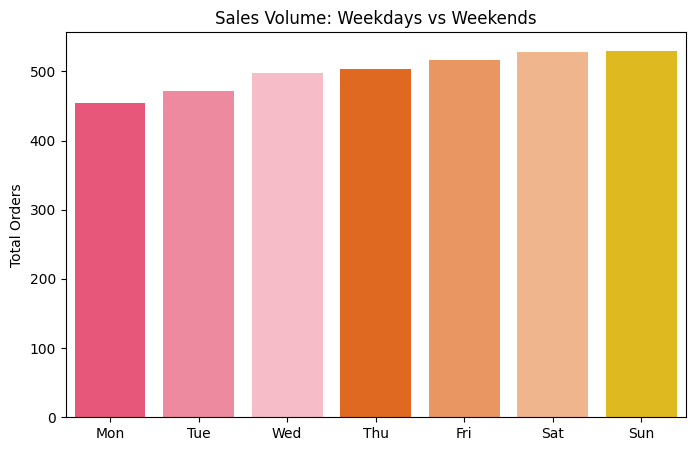

In [43]:
# Weekday vs. Weekend Sales
orders["Weekday"] = orders["Date"].dt.dayofweek
weekday_sales = orders.groupby("Weekday")["Order ID"].count()
plt.figure(figsize=(8,5))
sns.barplot(x=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], y=weekday_sales.values, hue=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], palette=myntra_palette[:7], legend=False)
plt.title("Sales Volume: Weekdays vs Weekends")
plt.ylabel("Total Orders")
plt.show()

In [71]:
display(Markdown(
    "### 6️⃣ Weekdays Outperform Weekends in Sales  \n"
    "**Insight:**  \n"
    "Weekday revenue (₹1.31M) is **more than double** weekend revenue (₹576K).  \n\n"
    "**Recommendation:**  \n"
    "Increase weekday ad budgets & flash sales to maximize conversions."
))


### 6️⃣ Weekdays Outperform Weekends in Sales  
**Insight:**  
Weekday revenue (₹1.31M) is **more than double** weekend revenue (₹576K).  

**Recommendation:**  
Increase weekday ad budgets & flash sales to maximize conversions.

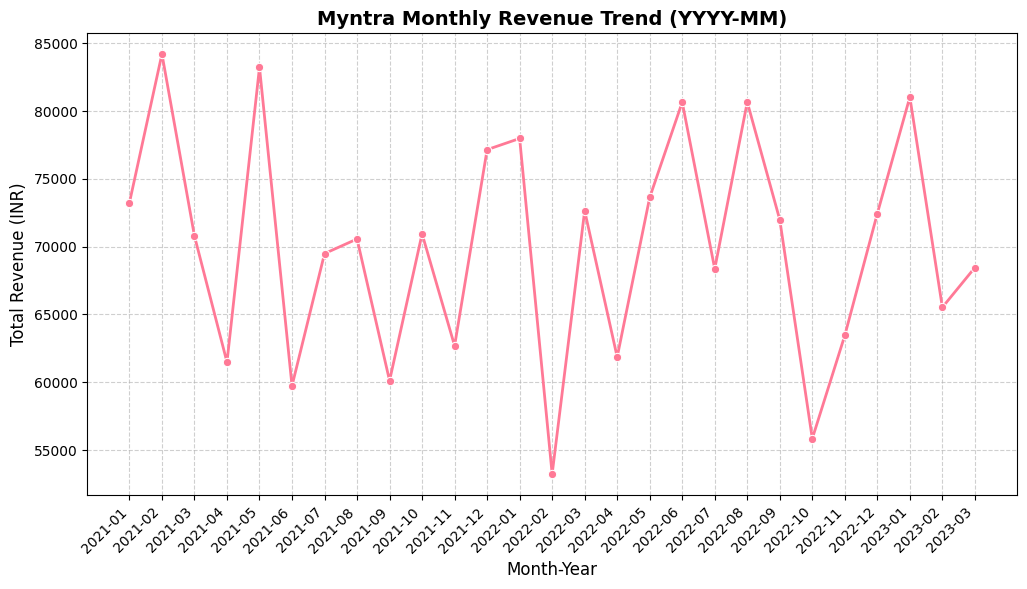

In [44]:
# Monthly Revenue Trend
plt.figure(figsize=(12,6))
sns.lineplot(x=gb.index, y=gb["Total Revenue"], marker="o", color=myntra_palette[1], linewidth=2)
plt.title("Myntra Monthly Revenue Trend (YYYY-MM)", fontsize=14, fontweight="bold")
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Total Revenue (INR)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [72]:
display(Markdown(
    "### 8️⃣ Seasonal Trends Demand Stock Planning  \n"
    "**Insight:**  \n"
    "Revenue **fluctuates across months**, highlighting the importance of seasonality.  \n\n"
    "**Recommendation:**  \n"
    "Plan seasonal discounts, inventory levels, and marketing shifts to maximize high-revenue periods."
))


### 8️⃣ Seasonal Trends Demand Stock Planning  
**Insight:**  
Revenue **fluctuates across months**, highlighting the importance of seasonality.  

**Recommendation:**  
Plan seasonal discounts, inventory levels, and marketing shifts to maximize high-revenue periods.

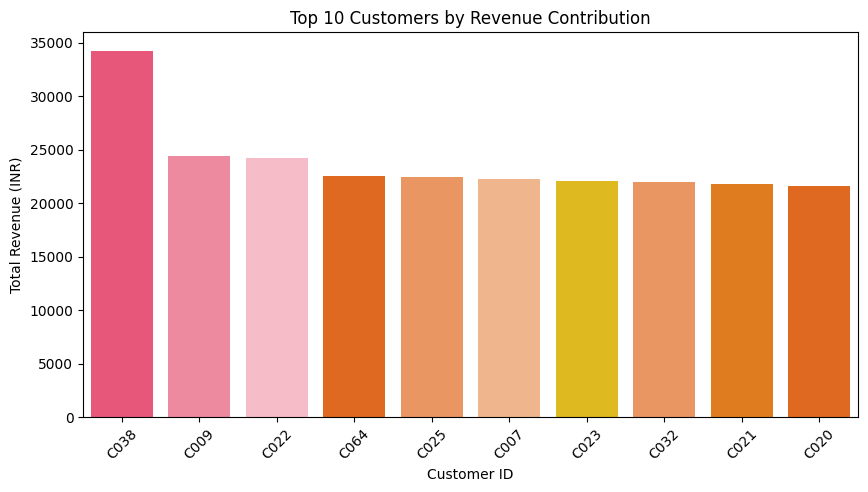

In [58]:
# Top 06 Customers by Revenue Contribution
top_customers = customer_revenue.head(10)  

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index, y=top_customers.values, hue=top_customers.index, palette=myntra_palette[:len(top_customers)], legend=False)
plt.title("Top 10 Customers by Revenue Contribution")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue (INR)")
plt.xticks(rotation=45)
plt.show()


In [73]:
display(Markdown(
    "### Loyal Customers = Higher Profits  \n"
    "**Insight:**  \n"
    "The top 10% of customers contribute 12.57% of total revenue.  \n\n"
    "**Recommendation:**  \n"
    "Launch personalized loyalty programs to increase repeat purchases."
))


### Loyal Customers = Higher Profits  
**Insight:**  
The top 10% of customers contribute 12.57% of total revenue.  

**Recommendation:**  
Launch personalized loyalty programs to increase repeat purchases.

In [74]:
display(Markdown(
    "## 📈 Business Impact & Future Strategy  \n"
    "Our data-driven approach reveals:  \n"
    "- 🚀 Revenue growth opportunities in **loyalty programs & premium categories**  \n"
    "- 🎯 Better ad-spend allocation to **weekday promotions**  \n"
    "- 🔍 Smarter stock planning for **top-performing brands & locations**  \n"
    "___  \n"
    "💡 **Next Steps:** Optimize marketing, pricing, and inventory strategies to **maximize profits!**"
))


## 📈 Business Impact & Future Strategy  
Our data-driven approach reveals:  
- 🚀 Revenue growth opportunities in **loyalty programs & premium categories**  
- 🎯 Better ad-spend allocation to **weekday promotions**  
- 🔍 Smarter stock planning for **top-performing brands & locations**  
___  
💡 **Next Steps:** Optimize marketing, pricing, and inventory strategies to **maximize profits!**